# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
print(weather_api_key)
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

14b2d784a9dee7016c6e0ea7dfc4d238


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+ weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q="+city 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | vadso
Processing Record 3 of Set 1 | port antonio
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | weno
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | hoxtolgay
City not found. Skipping...
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | debre werk'
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | guiuan
Processing Record 14 of Set 1 | uturoa
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | iskateley
Processing Record 17 of Set 1 | lamu
Processing Record 18 of Set 1 | ramnagar
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | newman
Processing Record 22 of S

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
row_count = city_data_df.shape[0]
print(f'Number of rows: {row_count}')

Number of rows: 568


In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,10.46,93,79,0.45,NZ,1728845959
1,vadso,70.0744,29.7487,7.09,81,75,11.83,NO,1728845960
2,port antonio,18.1800,-76.4612,31.37,55,9,5.79,JM,1728845961
3,port elizabeth,-33.9180,25.5701,17.16,98,75,7.20,ZA,1728845686
4,weno,7.4515,151.8468,27.74,79,100,3.14,FM,1728845963


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,10.46,93,79,0.45,NZ,1728845959
1,vadso,70.0744,29.7487,7.09,81,75,11.83,NO,1728845960
2,port antonio,18.1800,-76.4612,31.37,55,9,5.79,JM,1728845961
3,port elizabeth,-33.9180,25.5701,17.16,98,75,7.20,ZA,1728845686
4,weno,7.4515,151.8468,27.74,79,100,3.14,FM,1728845963


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

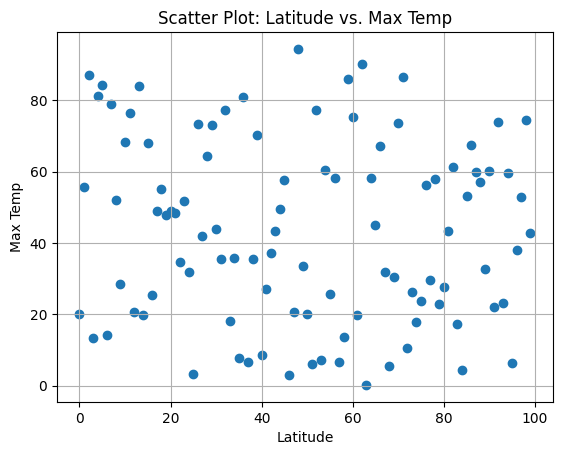

In [11]:
# Build scatter plot for latitude vs. temperature
x_limit = 100
y_limit = 100
x_axis = np.arange(0, x_limit, 1) 
y_axis = [random.random() * y_limit for value in x_axis]
# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.title('Scatter Plot: Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

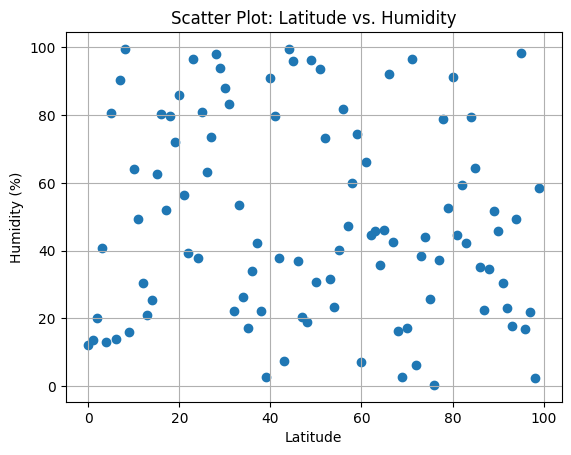

In [21]:
# Build the scatter plots for latitude vs. humidity
x_limit = 100
y_limit = 100
x_axis = np.arange(0, x_limit, 1) 
y_axis = [random.random() * y_limit for value in x_axis] 


# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.title('Scatter Plot: Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

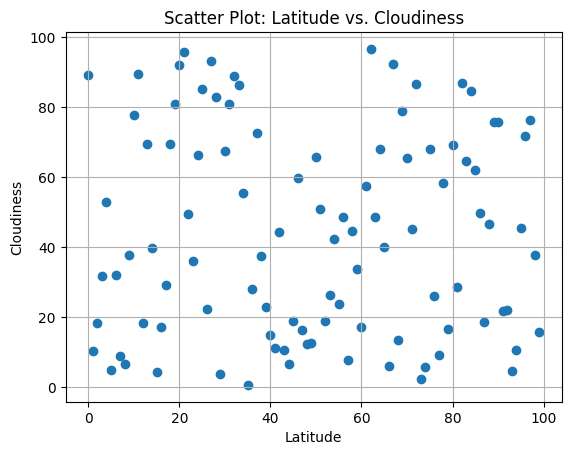

In [22]:
# Build the scatter plots for latitude vs. cloudiness
x_limit = 100
y_limit = 100
x_axis = np.arange(0, x_limit, 1) 
y_axis = [random.random() * y_limit for value in x_axis] 


# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.title('Scatter Plot: Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

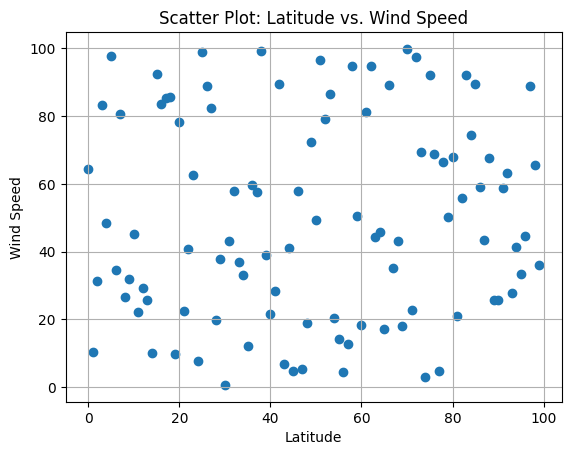

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_limit = 100
y_limit = 100
x_axis = np.arange(0, x_limit, 1) 
y_axis = [random.random() * y_limit for value in x_axis]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis)
plt.title('Scatter Plot: Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
data = city_data_df
df = pd.DataFrame(data)


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df[df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,vadso,70.0744,29.7487,7.09,81,75,11.83,NO,1728845960
2,port antonio,18.1800,-76.4612,31.37,55,9,5.79,JM,1728845961
4,weno,7.4515,151.8468,27.74,79,100,3.14,FM,1728845963
7,anadyr,64.7500,177.4833,-14.72,85,0,4.00,RU,1728845968
8,debre werk',10.6667,38.1667,12.62,88,94,1.50,ET,1728845970


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df[df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,10.46,93,79,0.45,NZ,1728845959
3,port elizabeth,-33.9180,25.5701,17.16,98,75,7.20,ZA,1728845686
5,port-aux-francais,-49.3500,70.2167,4.04,93,95,9.83,TF,1728845965
6,atafu village,-8.5421,-172.5159,27.85,74,95,5.06,TK,1728845967
11,uturoa,-16.7333,-151.4333,24.83,72,18,7.25,PF,1728845973


###  Temperature vs. Latitude Linear Regression Plot

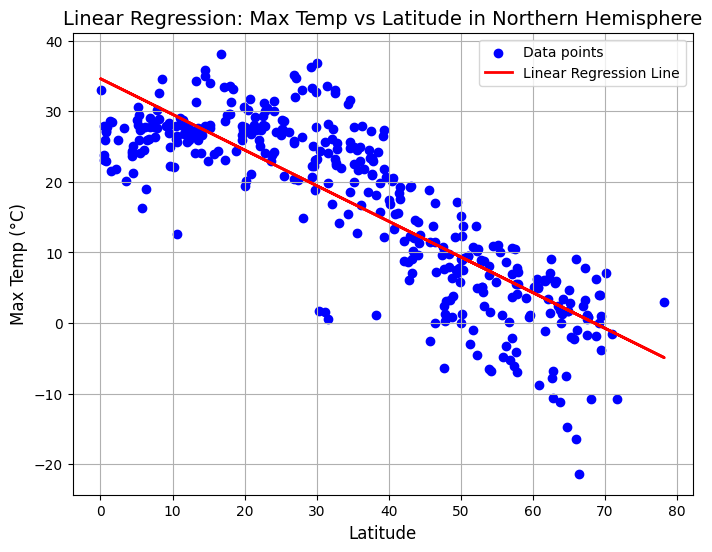

Slope: -0.5052279391444343
Intercept: 34.605582797359574
R-squared: 0.6958571567219204
P-value: 8.329028163344064e-102
Standard error: 0.017000921358372497
Linear Regression Model: y = -0.51x + 34.61


In [27]:

latitude = northern_hemi_df['Lat'].values  
max_temp = northern_hemi_df['Max Temp'].values 

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitude, max_temp)

# Generate values for the regression line
x_values = latitude
y_values = intercept + slope * x_values

# Plotting the data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(latitude, max_temp, color='blue', marker='o', label='Data points')
plt.plot(x_values, y_values, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temp (°C)', fontsize=12)
plt.title('Linear Regression: Max Temp vs Latitude in Northern Hemisphere', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")

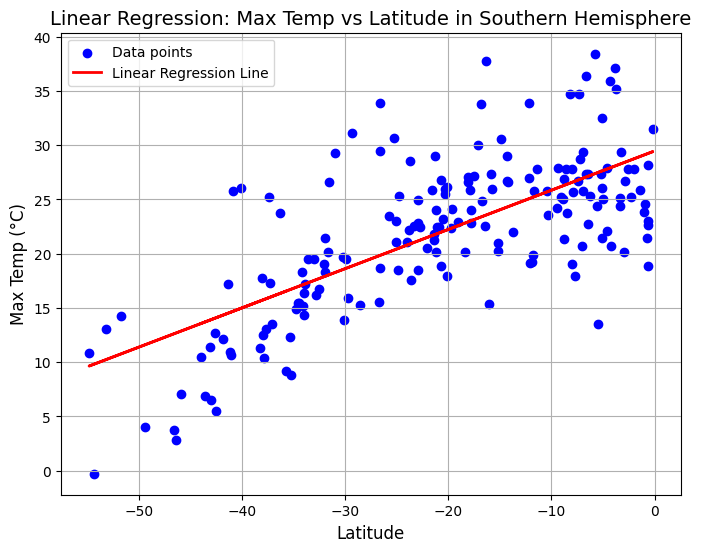

Slope: 0.36179901026452166
Intercept: 29.46936478699409
R-squared: 0.4845301789208244
P-value: 2.07499945226123e-27
Standard error: 0.027970393688495063
Linear Regression Model: y = 0.36x + 29.47


In [28]:
latitude = southern_hemi_df['Lat'].values  
max_temp = southern_hemi_df['Max Temp'].values 

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitude, max_temp)

# Generate values for the regression line
x_values = latitude
y_values = intercept + slope * x_values

# Plotting the data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(latitude, max_temp, color='blue', marker='o', label='Data points')
plt.plot(x_values, y_values, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temp (°C)', fontsize=12)
plt.title('Linear Regression: Max Temp vs Latitude in Southern Hemisphere', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#My response: The releationship between the latitude and max temp is positive(positive slope) and linear. The max temperature is increasing linearly as the latitude increase. 

### Humidity vs. Latitude Linear Regression Plot

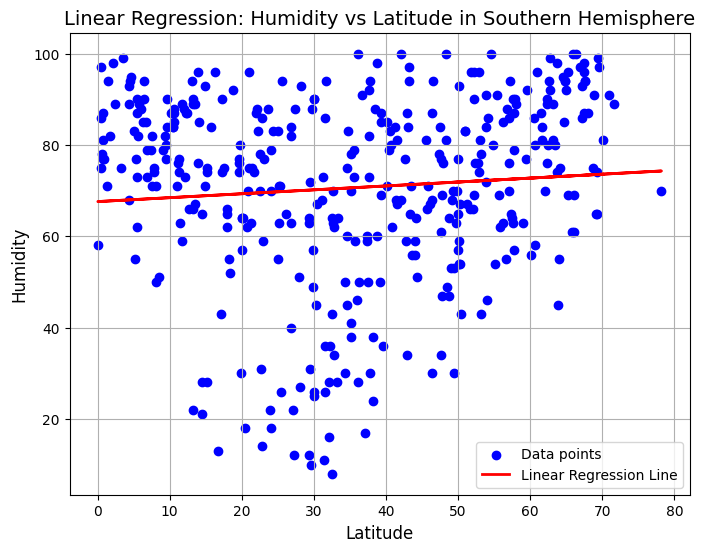

Slope: 0.08570705872131672
Intercept: 67.6103114712707
R-squared: 0.0067727861006629635
P-value: 0.10553808400617647
Standard error: 0.052827926423180536
Linear Regression Model: y = 0.09x + 67.61


In [31]:
latitude = northern_hemi_df['Lat'].values  
humidity = northern_hemi_df['Humidity'].values 

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitude, humidity)

# Generate values for the regression line
x_values = latitude
y_values = intercept + slope * x_values

# Plotting the data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(latitude, humidity, color='blue', marker='o', label='Data points')
plt.plot(x_values, y_values, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity', fontsize=12)
plt.title('Linear Regression: Humidity vs Latitude in Southern Hemisphere', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")

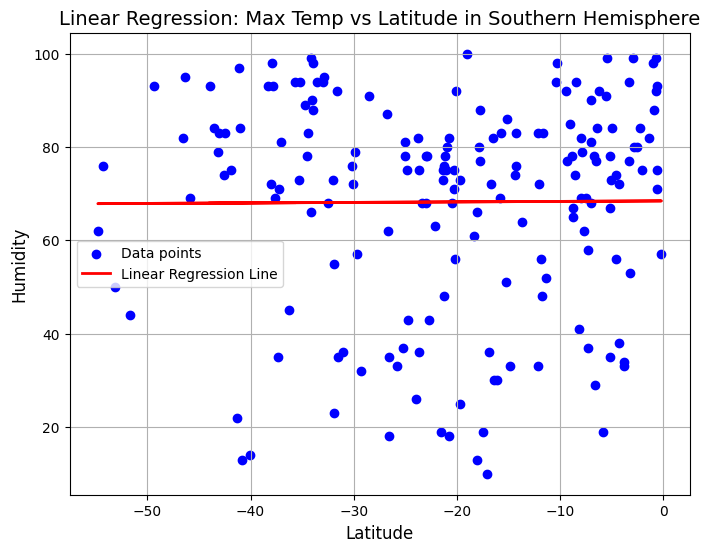

Slope: 0.01074796050393335
Intercept: 68.46169061704826
R-squared: 4.209940466226884e-05
P-value: 0.9311122468730593
Standard error: 0.12415635142465961
Linear Regression Model: y = 0.01x + 68.46


In [33]:
latitude = southern_hemi_df['Lat'].values  
humidity = southern_hemi_df['Humidity'].values 

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitude, humidity)

# Generate values for the regression line
x_values = latitude
y_values = intercept + slope * x_values

# Plotting the data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(latitude, max_temp, color='blue', marker='o', label='Data points')
plt.plot(x_values, y_values, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity', fontsize=12)
plt.title('Linear Regression: Max Temp vs Latitude in Southern Hemisphere', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#My response: The releationship between the latitude and humidity is a constant linear relationship. (horizontal) 

### Cloudiness vs. Latitude Linear Regression Plot

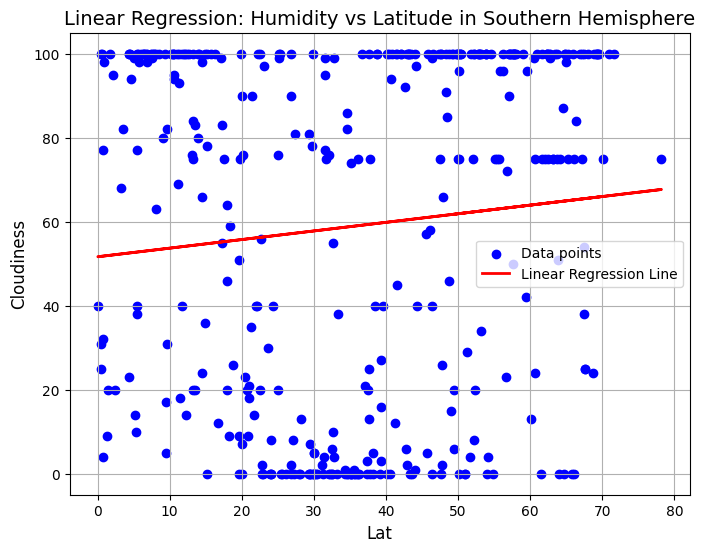

Slope: 0.20486644467581447
Intercept: 51.65541227147828
R-squared: 0.009864887332015135
P-value: 0.050589762697834835
Standard error: 0.10446681269759818
Linear Regression Model: y = 0.20x + 51.66


In [36]:
latitude = northern_hemi_df['Lat'].values  
cloudiness = northern_hemi_df['Cloudiness'].values 

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitude,cloudiness)

# Generate values for the regression line
x_values = latitude
y_values = intercept + slope * x_values

# Plotting the data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(latitude, cloudiness, color='blue', marker='o', label='Data points')
plt.plot(x_values, y_values, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Lat', fontsize=12)
plt.ylabel('Cloudiness', fontsize=12)
plt.title('Linear Regression: Humidity vs Latitude in Southern Hemisphere', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")

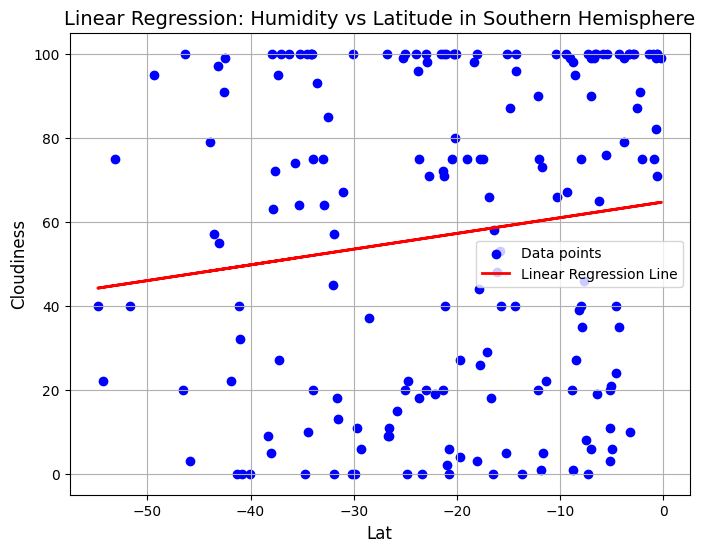

Slope: 0.37437100002436163
Intercept: 64.70503360437445
R-squared: 0.018663239703055577
P-value: 0.06744814465102046
Standard error: 0.20347343421882955
Linear Regression Model: y = 0.37x + 64.71


In [37]:
latitude = southern_hemi_df['Lat'].values  
cloudiness = southern_hemi_df['Cloudiness'].values 

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitude,cloudiness)

# Generate values for the regression line
x_values = latitude
y_values = intercept + slope * x_values

# Plotting the data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(latitude, cloudiness, color='blue', marker='o', label='Data points')
plt.plot(x_values, y_values, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Lat', fontsize=12)
plt.ylabel('Cloudiness', fontsize=12)
plt.title('Linear Regression: Humidity vs Latitude in Southern Hemisphere', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")

In [ ]:
#My response: The releationship between the latitude and cloudiness is positive(positive slope) and linear. The cloudiness is increasing linearly as the latitude increase. 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

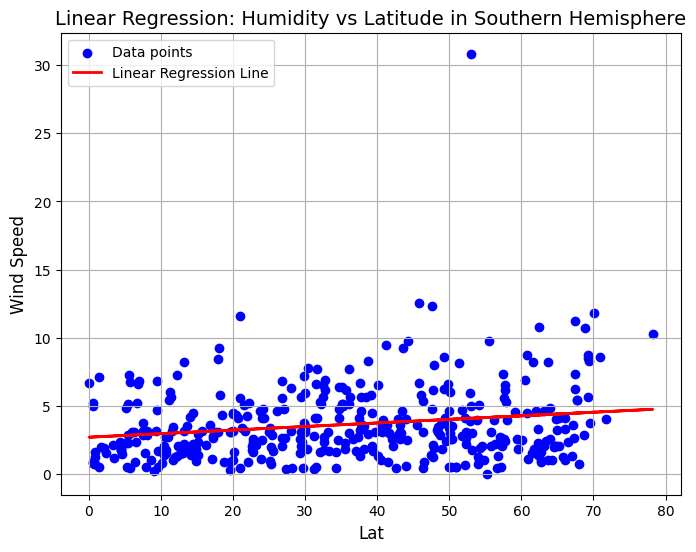

Slope: 0.02621402898601639
Intercept: 2.68117009436744
R-squared: 0.03553885667234457
P-value: 0.00018777092770945757
Standard error: 0.006950735536224344
Linear Regression Model: y = 0.03x + 2.68


In [38]:
latitude = northern_hemi_df['Lat'].values  
wind_speed = northern_hemi_df['Wind Speed'].values 

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitude,wind_speed)

# Generate values for the regression line
x_values = latitude
y_values = intercept + slope * x_values

# Plotting the data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(latitude, wind_speed, color='blue', marker='o', label='Data points')
plt.plot(x_values, y_values, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Lat', fontsize=12)
plt.ylabel('Wind Speed', fontsize=12)
plt.title('Linear Regression: Humidity vs Latitude in Southern Hemisphere', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")

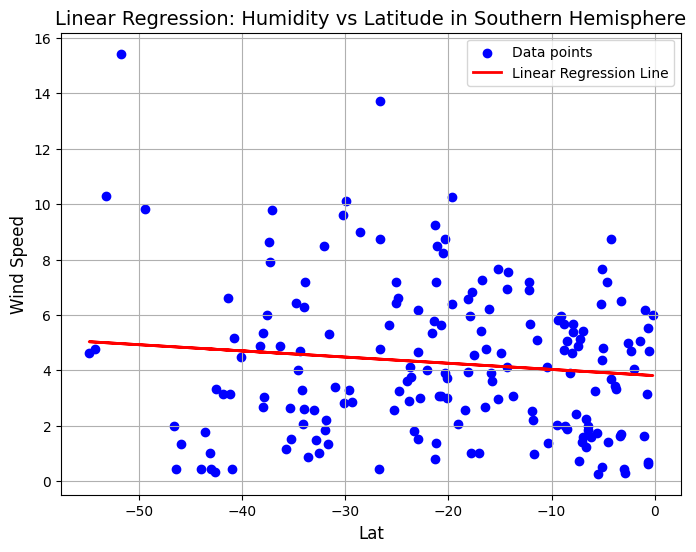

Slope: -0.022332215734139776
Intercept: 3.810671536912507
R-squared: 0.012868127782696467
P-value: 0.12946298194362335
Standard error: 0.014660599109788357
Linear Regression Model: y = -0.02x + 3.81


In [39]:
latitude = southern_hemi_df['Lat'].values  
wind_speed = southern_hemi_df['Wind Speed'].values 

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(latitude,wind_speed)

# Generate values for the regression line
x_values = latitude
y_values = intercept + slope * x_values

# Plotting the data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(latitude, wind_speed, color='blue', marker='o', label='Data points')
plt.plot(x_values, y_values, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Lat', fontsize=12)
plt.ylabel('Wind Speed', fontsize=12)
plt.title('Linear Regression: Humidity vs Latitude in Southern Hemisphere', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#My response: The releationship between the latitude and wind speed is negative(negative slope) and linear. The wind speed is decreasely linearly as the latitude increase. 